In [1]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)
install.packages("ggplot2")
library("ggplot2")


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'nbconvertR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpc3PPIc\downloaded_packages


Warning message:
"package 'nbconvertR' was built under R version 3.6.3"Installing package into 'C:/Users/bbalamdari/OneDrive - Ecolab/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbalamdari\AppData\Local\Temp\Rtmpc3PPIc\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
edvoldata = read.csv("EGD.csv",header=T)
## Process Dates
year = edvoldata$Year
month = edvoldata$Month
day = edvoldata$Day

head(edvoldata, n=10)


,Year,Month,Day,Volume
,<int>,<int>,<int>,<int>
1,2010,1,1,135
2,2010,1,2,163
3,2010,1,3,139
4,2010,1,4,139
5,2010,1,5,122
6,2010,1,6,119
7,2010,1,7,118
8,2010,1,8,133
9,2010,1,9,125


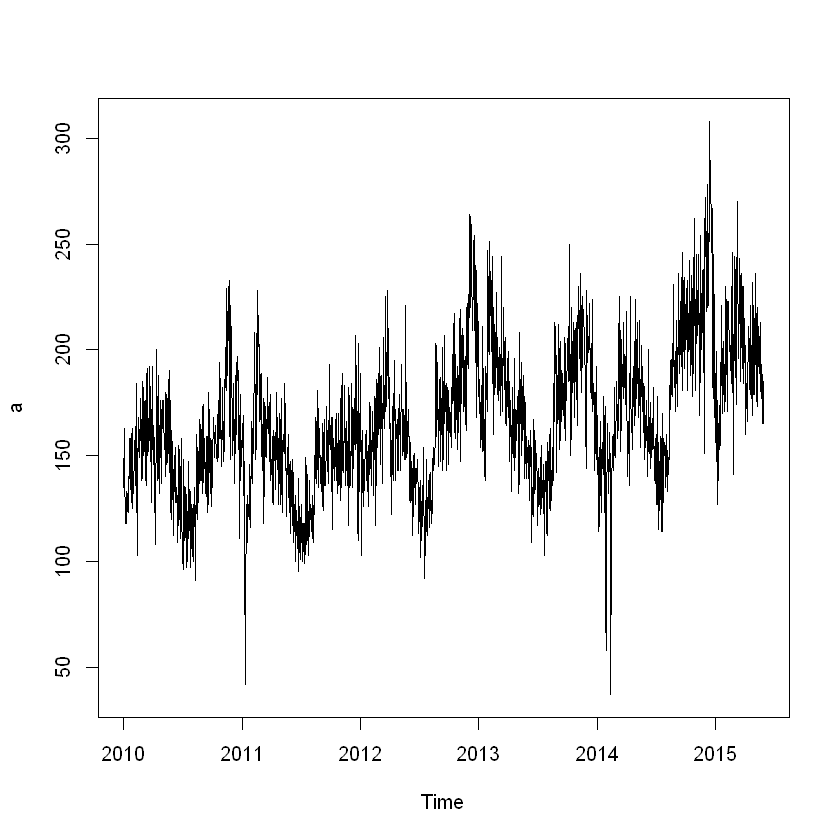

In [9]:
a=ts(edvoldata $Volume, start=c(2010,1), freq=365.24)
plot(a)

In [3]:
datemat = cbind(as.character(day),as.character(month),as.character(year))

paste.dates = function(date){
    day = date[1]; month=date[2]; year = date[3]
    return(paste(day,month,year,sep="/"))
 }


dates = apply(datemat,1,paste.dates)
dates = as.Date(dates, format="%d/%m/%Y")
edvoldata = cbind(dates,edvoldata)
attach(edvoldata)
head(edvoldata, n=5)

The following object is masked _by_ .GlobalEnv:

    dates



,dates,Year,Month,Day,Volume
,<date>,<int>,<int>,<int>,<int>
1,2010-01-01,2010,1,1,135
2,2010-01-02,2010,1,2,163
3,2010-01-03,2010,1,3,139
4,2010-01-04,2010,1,4,139
5,2010-01-05,2010,1,5,122


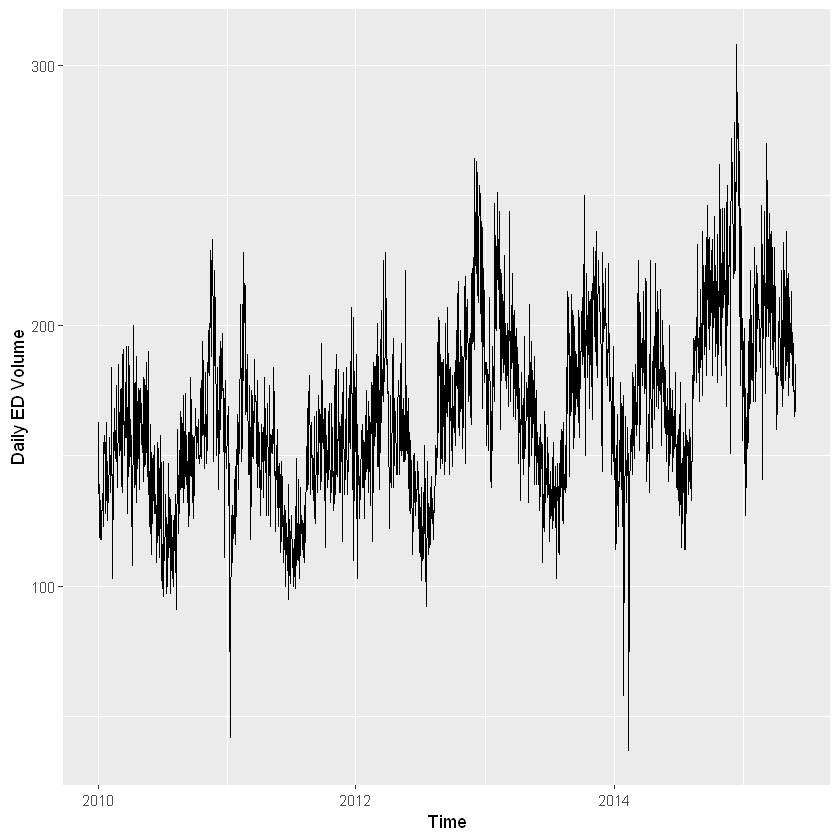

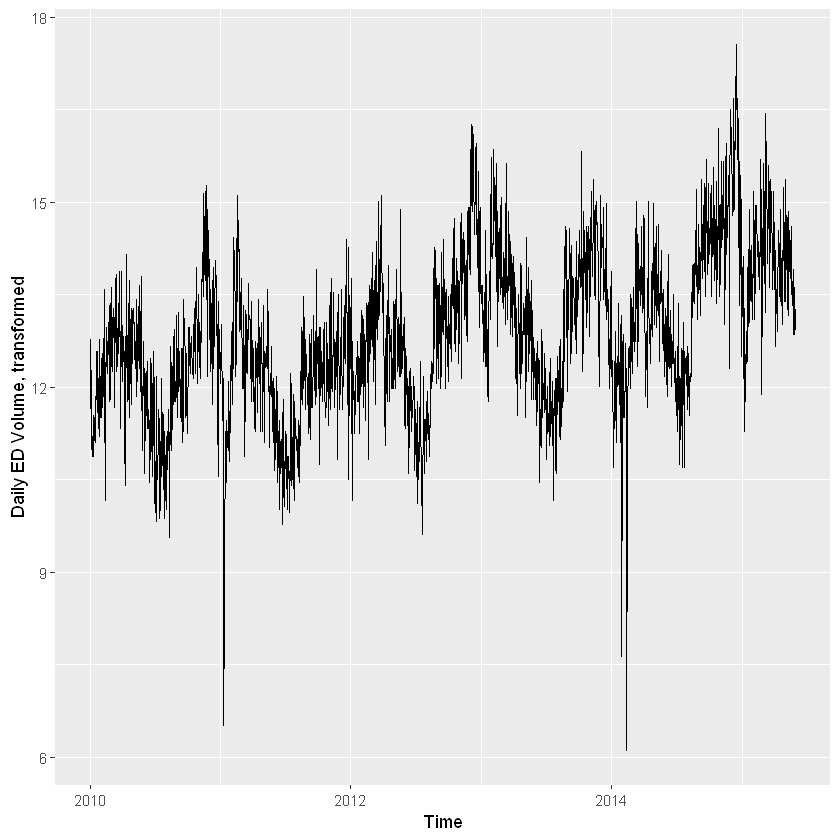

In [4]:
Volume.tr = sqrt(Volume+3/8)
ggplot(edvoldata, aes(dates, Volume))+geom_line()+xlab("Time")+ylab("Daily ED Volume")
ggplot(edvoldata, aes(dates, Volume.tr))+geom_line()+xlab("Time")+ylab("Daily ED Volume, transformed")

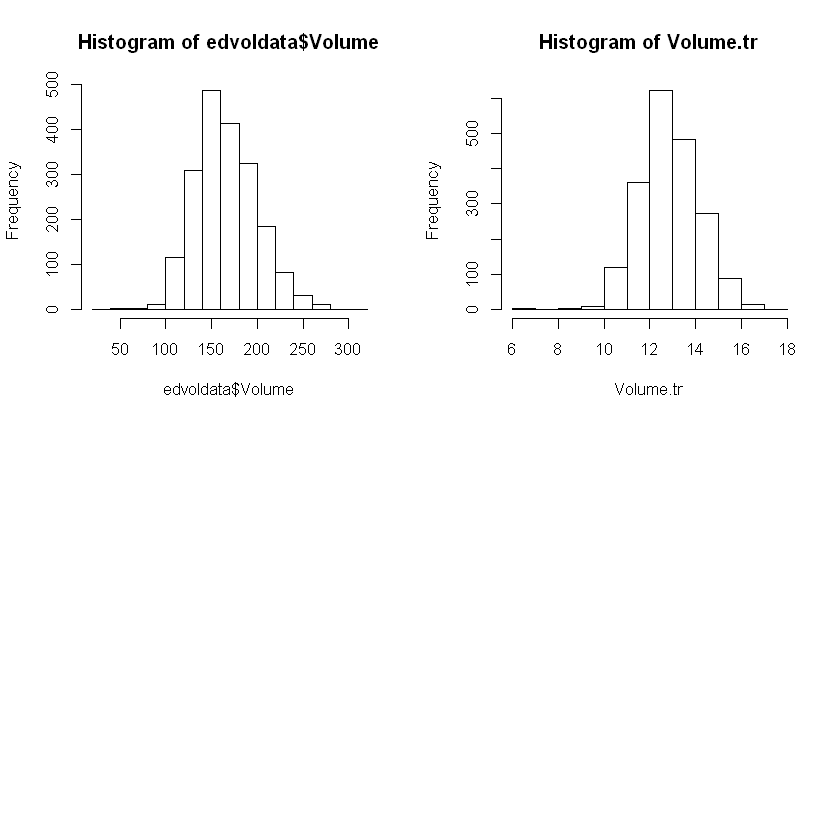

In [12]:
par(mfrow=c(2,2))
hist(edvoldata$Volume)
hist(Volume.tr)

In [13]:
## Model Trend + Monthly Seasonality
time.pts = c(1:length(Volume))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

loc.fit=loess(Volume.tr~time.pts)
vol.fit.loc=fitted(loc.fit)

gam.fit=gam(Volume.tr~s(time.pts))
vol.fit.gam=fitted(gam.fit)
summary(gam.fit)



Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.85769    0.02441   526.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.pts) 8.628   8.96 93.39  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.296   Deviance explained = 29.9%
GCV =  1.184  Scale est. = 1.1782    n = 1977

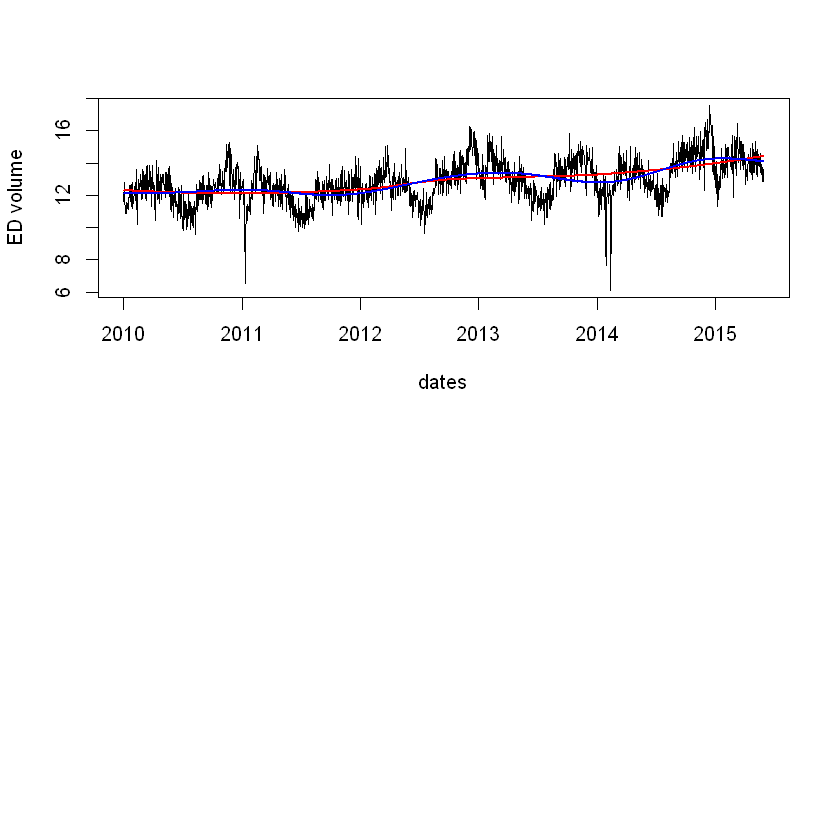

In [14]:
par(mfrow=c(2,1))
plot(dates, Volume.tr, ylab="ED volume", type="l")
lines(dates, vol.fit.loc, col="red", lwd=2)
lines(dates, vol.fit.gam, col="blue", lwd=2)


Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts) + month

Parametric coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.86352    0.06200 207.472  < 2e-16 ***
monthAugust    -0.50070    0.09192  -5.447 5.76e-08 ***
monthDecember   0.93644    0.09128  10.259  < 2e-16 ***
monthFebruary   0.33487    0.08835   3.790 0.000155 ***
monthJanuary   -0.59912    0.08685  -6.898 7.09e-12 ***
monthJuly      -1.53494    0.09170 -16.739  < 2e-16 ***
monthJune      -1.00621    0.09220 -10.913  < 2e-16 ***
monthMarch      0.62121    0.08590   7.232 6.81e-13 ***
monthMay        0.05152    0.08589   0.600 0.548708    
monthNovember   0.94133    0.09242  10.186  < 2e-16 ***
monthOctober    0.41487    0.09189   4.515 6.71e-06 ***
monthSeptember  0.22663    0.09277   2.443 0.014657 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
              edf Ref.df     F p-value    
s(time.

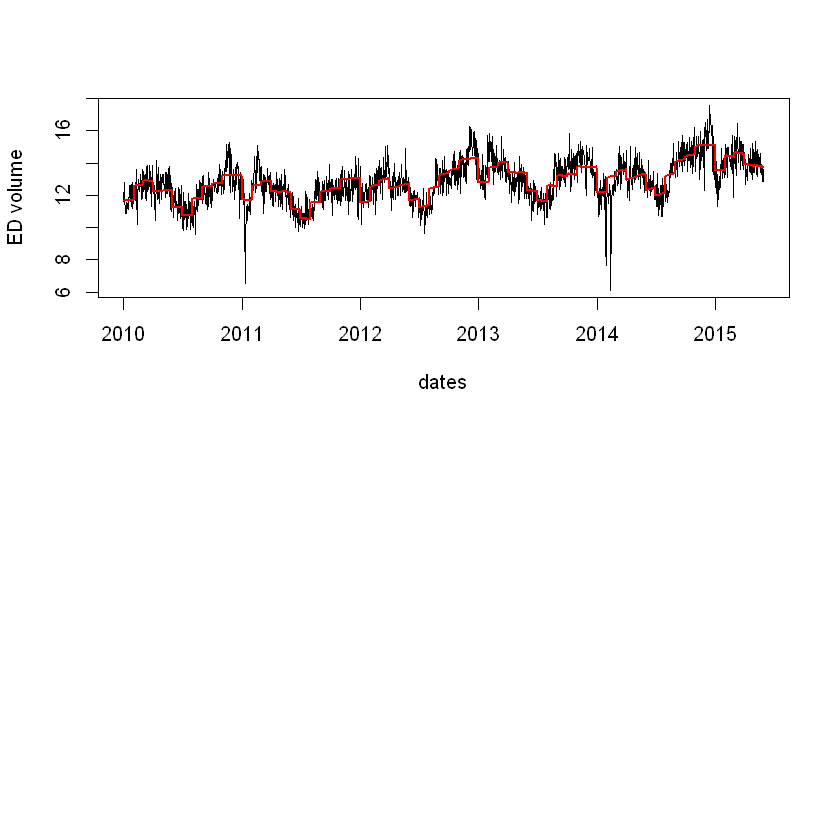

In [19]:
## Model Trend + Monthly Seasonality
## Using nonparametric trend and linear regression seasonality 
#month = as.factor(format(dates,"%b"))
month= as.factor(months(dates))
gam.fit.seastr.1 = gam(Volume.tr~s(time.pts)+month)
summary(gam.fit.seastr.1)

par(mfrow=c(2,1))
vol.fit.gam.seastr.1 = fitted(gam.fit.seastr.1)
plot(dates, Volume.tr, ylab="ED volume", type="l")
lines(dates,vol.fit.gam.seastr.1,lwd=2,col="red")


Family: gaussian 
Link function: identity 

Formula:
Volume.tr ~ s(time.pts) + month + week

Parametric coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.77772    0.07383 173.063  < 2e-16 ***
monthAugust    -0.50061    0.08852  -5.655 1.79e-08 ***
monthDecember   0.93273    0.08791  10.611  < 2e-16 ***
monthFebruary   0.33589    0.08509   3.948 8.17e-05 ***
monthJanuary   -0.59767    0.08365  -7.145 1.26e-12 ***
monthJuly      -1.53530    0.08831 -17.385  < 2e-16 ***
monthJune      -1.00553    0.08880 -11.324  < 2e-16 ***
monthMarch      0.61815    0.08272   7.472 1.18e-13 ***
monthMay        0.05271    0.08272   0.637  0.52403    
monthNovember   0.94163    0.08900  10.580  < 2e-16 ***
monthOctober    0.41557    0.08849   4.696 2.84e-06 ***
monthSeptember  0.22391    0.08935   2.506  0.01229 *  
weekMonday      0.57169    0.06647   8.601  < 2e-16 ***
weekSaturday    0.04589    0.06641   0.691  0.48967    
weekSunday      0.17538    0.06641   2.64

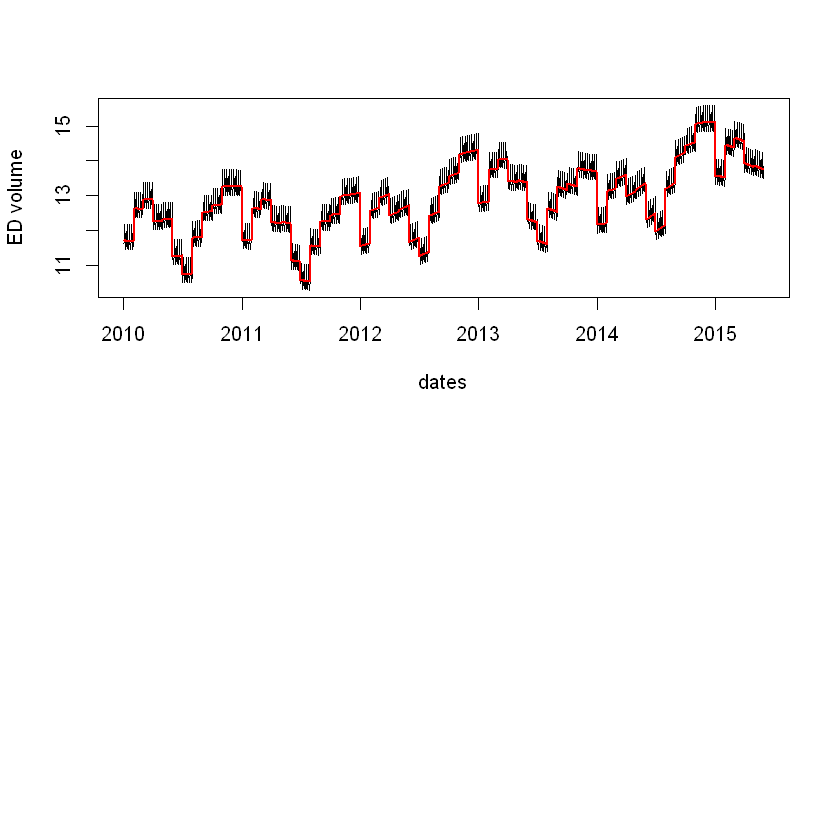

In [21]:
## Add day-of-the-week seasonality
week = as.factor(weekdays(dates))
gam.fit.seastr.2 = gam(Volume.tr~s(time.pts)+month+week)
summary(gam.fit.seastr.2)
vol.fit.gam.seastr.2 = fitted(gam.fit.seastr.2)
## Compare the two fits: with & without day-of-the-week seasonality
par(mfrow=c(2,1))
plot(dates, vol.fit.gam.seastr.2, ylab="ED volume", type="l")
lines(dates,vol.fit.gam.seastr.1,lwd=2,col="red")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1965,2169.875,NA,NA,NA,NA
2,1959,2071.048,6,98.82605,15.57989,1.543093e-17



Call:
lm(formula = Volume.tr ~ month + week)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8820 -0.6676 -0.0522  0.6785  3.2010 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.79271    0.09521 134.363  < 2e-16 ***
monthAugust    -0.54653    0.11267  -4.851 1.33e-06 ***
monthDecember   0.99620    0.11267   8.842  < 2e-16 ***
monthFebruary   0.31231    0.11013   2.836 0.004618 ** 
monthJanuary   -0.62854    0.10751  -5.846 5.87e-09 ***
monthJuly      -1.61857    0.11267 -14.366  < 2e-16 ***
monthJune      -1.12748    0.11368  -9.918  < 2e-16 ***
monthMarch      0.60803    0.10751   5.656 1.78e-08 ***
monthMay        0.06362    0.10751   0.592 0.554082    
monthNovember   0.98407    0.11367   8.657  < 2e-16 ***
monthOctober    0.43278    0.11267   3.841 0.000126 ***
monthSeptember  0.21156    0.11367   1.861 0.062878 .  
weekMonday      0.57071    0.08652   6.597 5.40e-11 ***
weekSaturday    0.04689    0.08644   0.542 0.587541    
weekS

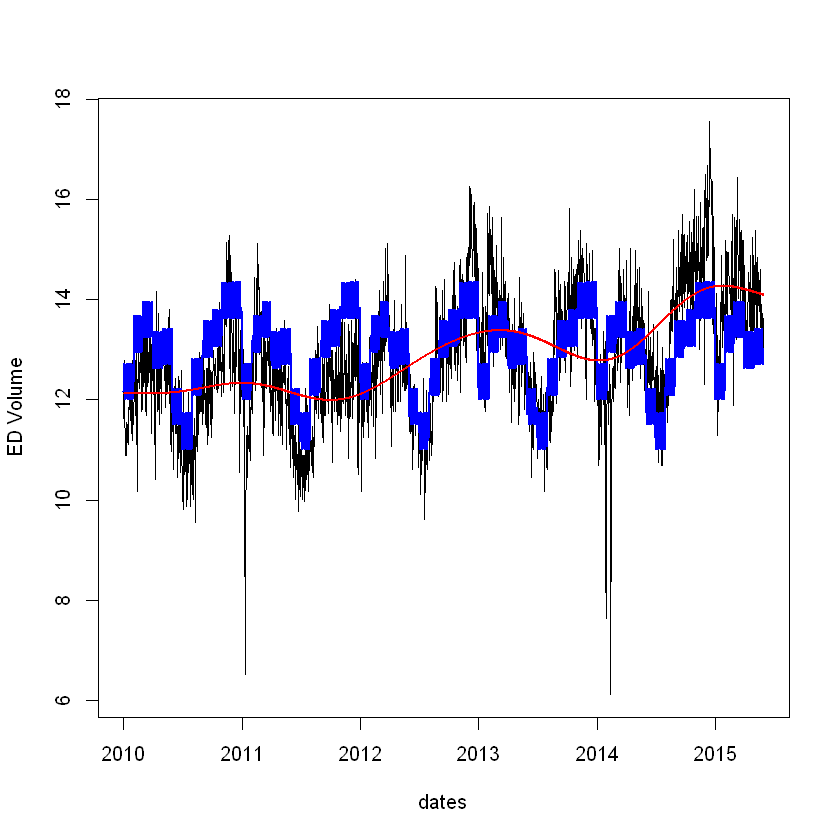

In [23]:
## Does the addition of seasonality of day of the week adds predictive power?
lm.fit.seastr.1 = lm(Volume.tr~month)
lm.fit.seastr.2 = lm(Volume.tr~month+week)
anova(lm.fit.seastr.1,lm.fit.seastr.2)
vol.fit.lm.seastr.2 = fitted(lm.fit.seastr.2)
## Compare with & without trend
plot(dates, Volume.tr, type="l", ylab="ED Volume")
lines(dates,vol.fit.lm.seastr.2,lwd=2,col="blue")
lines(dates,vol.fit.gam,lwd=2,col="red")

summary(lm.fit.seastr.2)

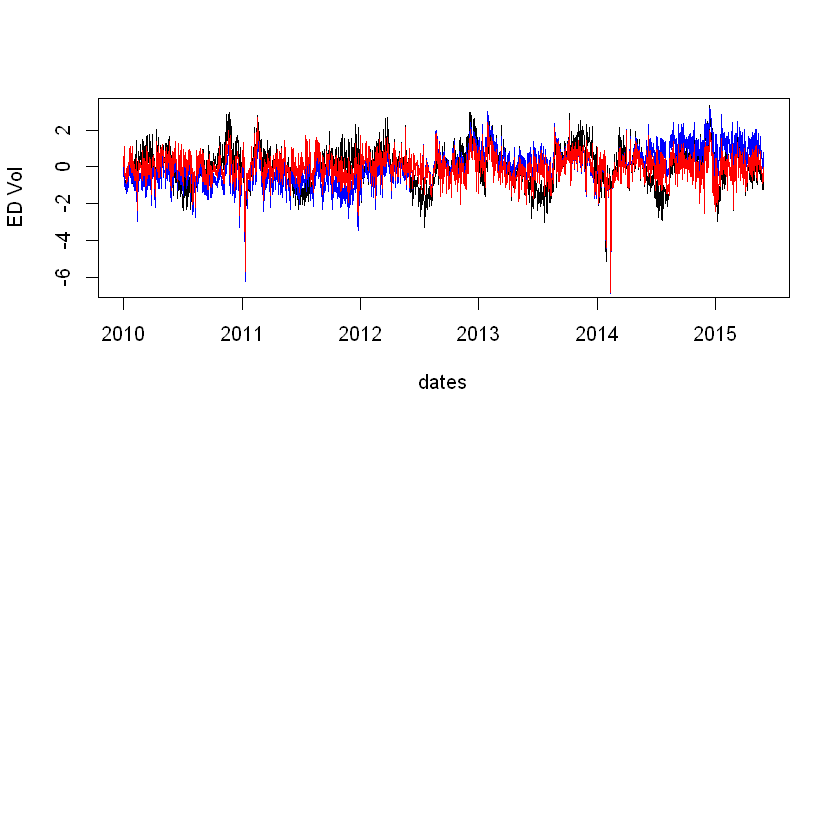

In [24]:
################## STATIONARITY: RESIDUAL PROCESS ####################
## Residual Process: Trend Removal
resid.1 = Volume.tr-vol.fit.gam
## Residual Process: Stationarity Removal
resid.2 = Volume.tr-vol.fit.lm.seastr.2
## Residual Process: Trend & Stationarity Removal
resid.3 = Volume.tr-vol.fit.gam.seastr.2
y.min = min(c(resid.1,resid.2,resid.3))
y.max = max(c(resid.1,resid.2,resid.3))

par(mfrow=c(2,1))
plot(dates, resid.1, type="l", ylab="ED Vol")
lines(dates,resid.2,col="blue")
lines(dates,resid.3,col="red")
#legend(2012,-3.5,legend=c("Trend","Season","Trend+Season"),lty = 1, col=c("black","blue","brown"))

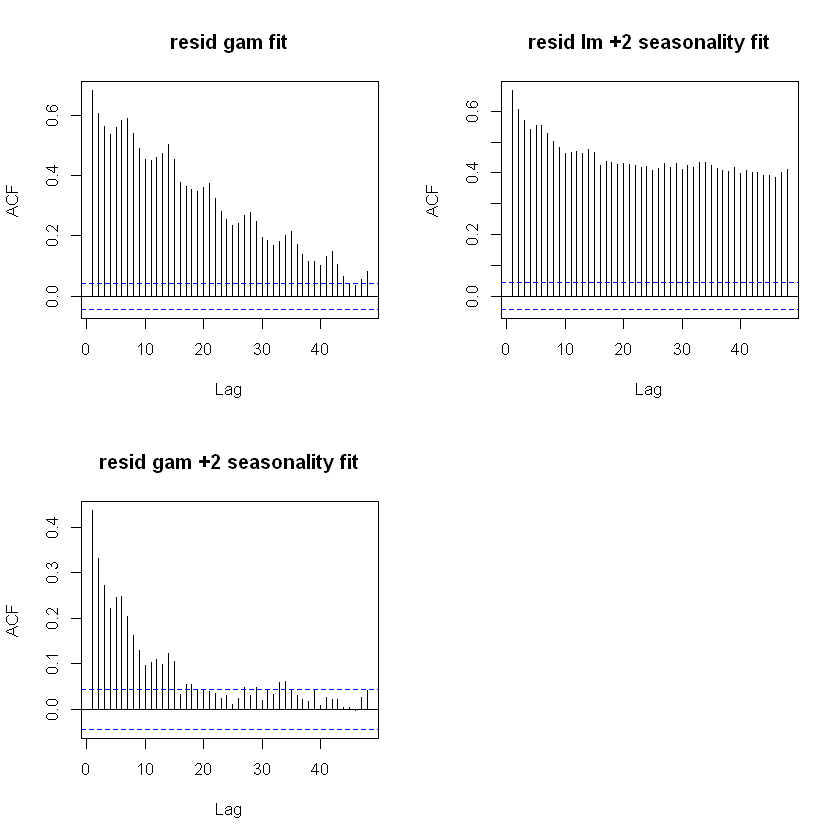

In [25]:
par(mfrow=c(2,2))
acf(resid.1, lag.max=12*4, main="resid gam fit")
acf(resid.2, lag.max=12*4, main="resid lm +2 seasonality fit")
acf(resid.3, lag.max=12*4, main="resid gam +2 seasonality fit")